# Прогнозирование оттока клиентов оператора связи

# Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Описание услуг

Оператор предоставляет два основных типа услуг: 
* Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
1. Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
2. Выделенная линия технической поддержки (TechSupport);
3. Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
4. Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies). 

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

# Описание данных

Данные состоят из файлов, полученных из разных источников:
* contract_new.csv — информация о договоре;
* personal_new.csv — персональные данные клиента;
* internet_new.csv — информация об интернет-услугах;
* phone_new.csv — информация об услугах телефонии. 

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Импорт бибилиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Чтение данных

In [2]:
contract = pd.read_csv('/datasets/contract_new.csv', 
                      parse_dates=['BeginDate', 'EndDate'])
personal = pd.read_csv('/datasets/personal_new.csv')
internet = pd.read_csv('/datasets/internet_new.csv')
phone = pd.read_csv('/datasets/phone_new.csv')

## Предварительный анализ

### Информация о договоре

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [5]:
# Посмотрим на даты, представленные в датасете
print(min(contract['BeginDate']))
print(max(contract['BeginDate']))

2013-10-01 00:00:00
2020-02-01 00:00:00


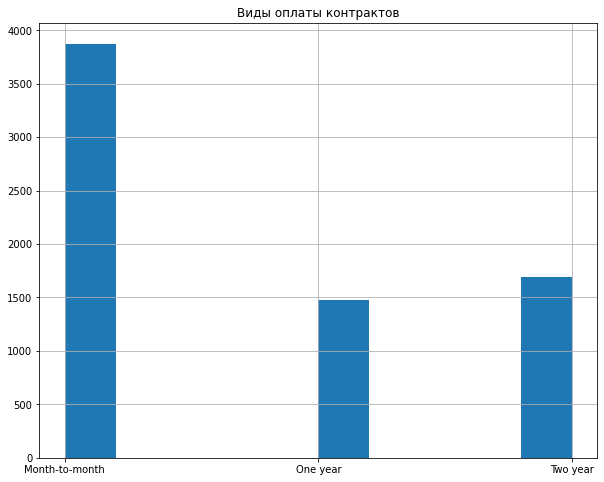

In [6]:
contract['Type'].hist(figsize=(10,8))
plt.title('Виды оплаты контрактов')
plt.show()

Большинство клиентов опачивают услугу каждый месяц, но количество людей, которые оплачивают услуги раз в 2 года больше, чем ежегодных оплат. Вероятно, это связано с тем, что существуют некоторые льготы для постоянных клиентов.

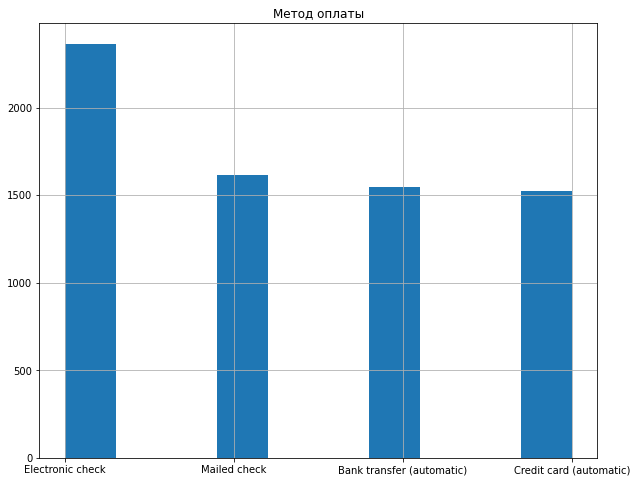

In [7]:
contract['PaymentMethod'].hist(figsize=(10,8))
plt.title('Метод оплаты')
plt.show()

Самым популярным методом оплаты является электронный способ.

In [8]:
contract.pivot_table(index='Type', values='MonthlyCharges')

,MonthlyCharges
Type,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


Чем меньше срок оплаты, тем выше цена услуг.

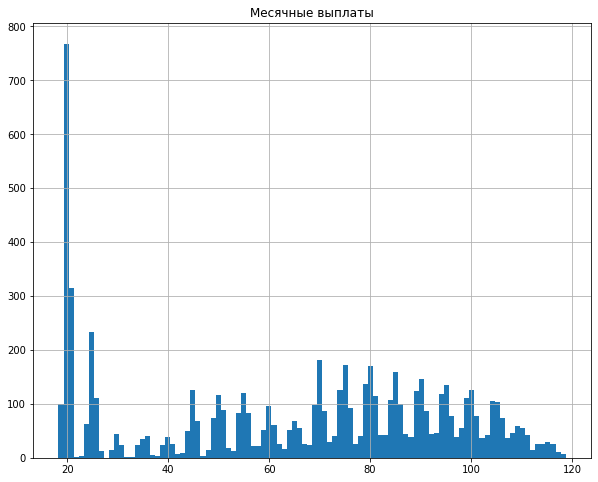

In [9]:
contract['MonthlyCharges'].hist(bins=100, figsize=(10,8))
plt.title('Месячные выплаты')
plt.show()

### Персональные данные

In [10]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


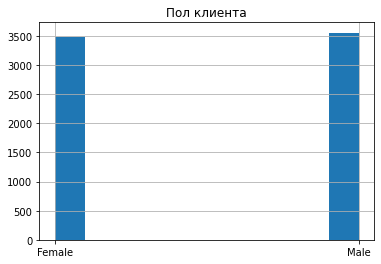

In [12]:
personal['gender'].hist()
plt.title('Пол клиента')
plt.show()

В датасете практически одинаковое количество мужчин и женщин.

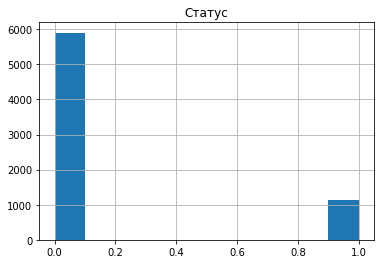

In [13]:
personal['SeniorCitizen'].hist()
plt.title('Статус')
plt.show()

1 соответствует статусу пенсионера, 0, соответственно, нет. Как видим, пожилых клинтов примерно в 6 раз меньше.

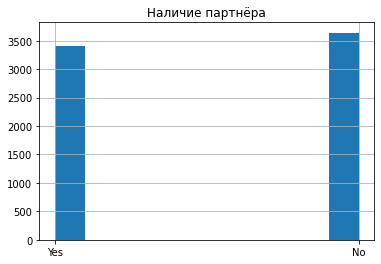

In [14]:
personal['Partner'].hist()
plt.title('Наличие партнёра')
plt.show()

Количество холостых клиентов немного превышает количество замужних/женытых.

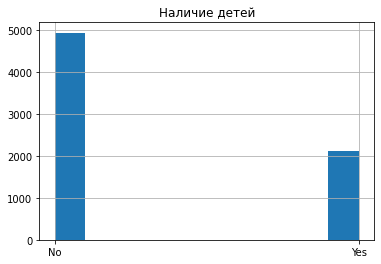

In [15]:
personal['Dependents'].hist()
plt.title('Наличие детей')
plt.show()

У большинства клиентов нет детей.

### Данные о предоставляемых услугах

In [16]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


В этом датасете количество строк уже меньше, чем в предыдущих, а значит, здесь предоставлена информация не о всех клиентах.

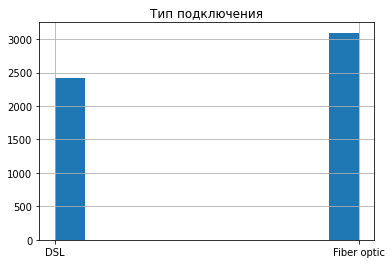

In [18]:
internet['InternetService'].hist()
plt.title('Тип подключения')
plt.show()

Большинство клиентов использует оптоволокно.

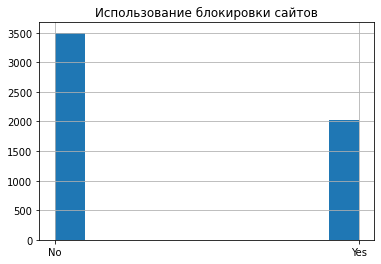

In [19]:
internet['OnlineSecurity'].hist()
plt.title('Использование блокировки сайтов')
plt.show()

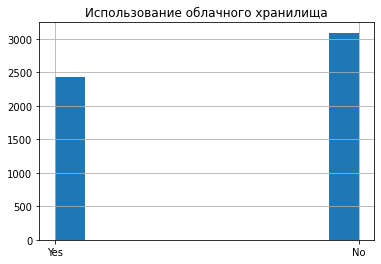

In [20]:
internet['OnlineBackup'].hist()
plt.title('Использование облачного хранилища')
plt.show()

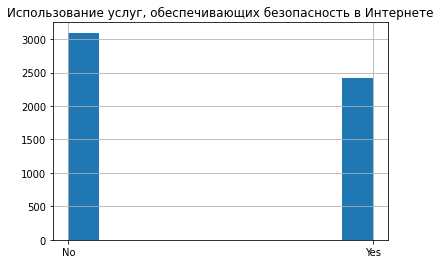

In [21]:
internet['DeviceProtection'].hist()
plt.title('Использование услуг, обеспечивающих безопасность в Интернете')
plt.show()

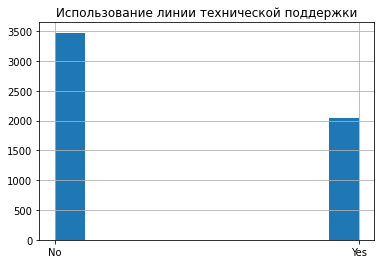

In [22]:
internet['TechSupport'].hist()
plt.title('Использование линии технической поддержки')
plt.show()

Пользователи больше склонны не пользоваться дополнительными услугами, обеспечивающими безопасность в Интернете.

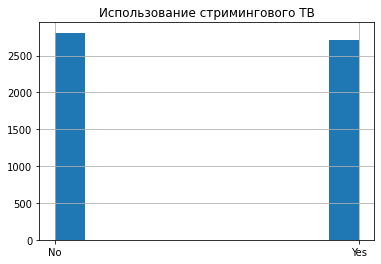

In [23]:
internet['StreamingTV'].hist()
plt.title('Использование стримингового ТВ')
plt.show()

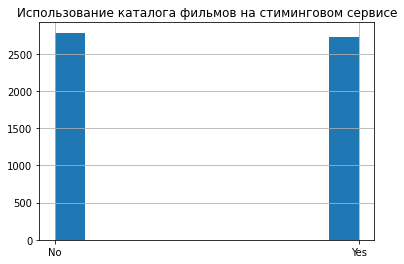

In [24]:
internet['StreamingMovies'].hist()
plt.title('Использование каталога фильмов на стиминговом сервисе')
plt.show()

Пооловина клиентов подключает себе услуги стримингового сервиса.

### Данные о ведении параллельных звонков

In [25]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [26]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


В этом датасете отсутствуют данные о некоторых пользователях.

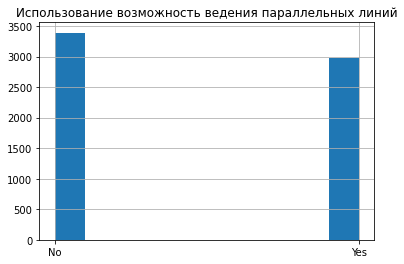

In [27]:
phone['MultipleLines'].hist()
plt.title('Использование возможность ведения параллельных линий')
plt.show()

Чуть больше половины пользователей отказываются от этой услуги.

## План
* провести первичную подготовку данных: изменить типы данных, обработать пропуски, добавить дополнительный признак о продолжительности предоставления услуг.
* провести исследовательский анализ: избавиться от выбросов, провести визуализацию данных
* обучить различные модели, подобрать оптимальные параметры для достижения нужного значения метрики ROC AUC
* на основе обучения выбираем наилучшую модель и проверяем на тестовой выборке
* сделать вывод по итогам проделанной работы

## Предобработка данных

Добавим целевой признак, 0 - если клиент продолжает пользоваться услугами, 1 - если клиент ушёл.

In [28]:
contract['target'] = (contract['EndDate'] != 'No').astype(int)

In [29]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0


Теперь нужно заменить значения 'No' в столбце на дату выгрузки датасета: 1 февраля 2020.

In [30]:
data_load = '2020-02-01'

In [31]:
contract['EndDate'] = contract['EndDate'].replace('No', data_load)

Теперь поменяем типы данных в столбцах.

In [32]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

Создадим новый столбец с количеством дней

In [33]:
contract['totaldays'] = (contract['EndDate'] - contract['BeginDate']).dt.days

В столбце TotalCharge имеются пропуски, которые нужно заменить на 0. 

In [34]:
contract.loc[contract['TotalCharges'] == ' ', 'TotalCharges'] = 0
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

In [35]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   totaldays         7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


Объединим все датасеты в одну таблицу

In [36]:
data = contract.merge(personal, how='left', on='customerID')
data = data.merge(internet, how='left', on='customerID')
data = data.merge(phone, how='left', on='customerID')

In [37]:
#сделаем из id клиентов индексы
data = data.set_index('customerID')

In [38]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,totaldays,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   target            7043 non-null   int64         
 8   totaldays         7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity

На лицо пропуски в столбцах InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines. Вероятно, это означает, что данные услуги не используются или не были подключены. Поэтому можем заменить пропуски на 'No'.

In [40]:
data = data.fillna('No')

## Исследовательский анализ данных

Посмотрим на распределение целевого признака по классам.

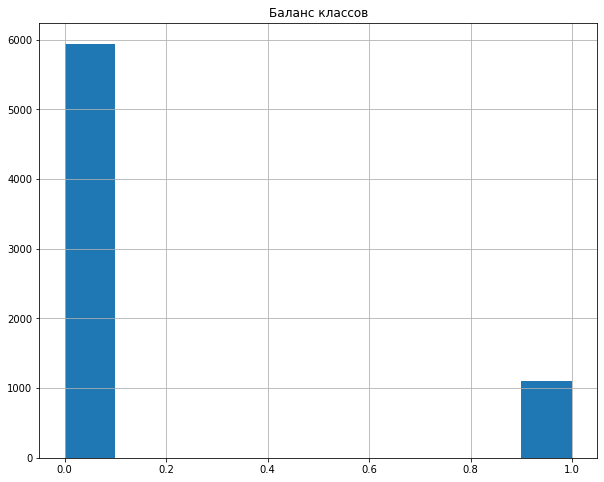

In [41]:
data['target'].hist(figsize=(10,8))
plt.title('Баланс классов')
plt.show()

Существует значительный дисбаланс классов в сторону клиентов, которые всё ещё пользуются услугами.

Посмотрим на ежемесячные платежи для этих двух классов. 

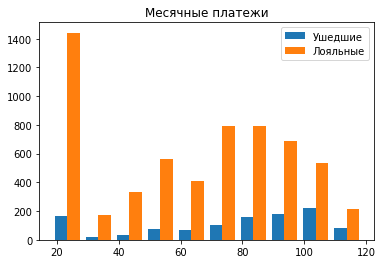

In [42]:
plt.hist([data[data['target'] == 1].MonthlyCharges, 
         data[data['target'] == 0].MonthlyCharges],
        label=['Ушедшие', 'Лояльные'])
plt.title('Месячные платежи')
plt.legend()
plt.show()

Для ушедших и оставшихся клиетов есть 2 пика: в районе маленьких ежемесячных платежей (20) и в области 80 и 100, соответственно, для лояльных и ушедших клиентов.

Посмотрим на полные платежи для двух классов.

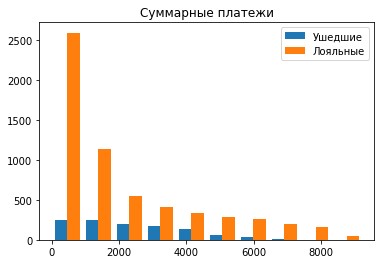

In [43]:
plt.hist([data[data['target'] == 1].TotalCharges, 
         data[data['target'] == 0].TotalCharges],
        label=['Ушедшие', 'Лояльные'])
plt.title('Суммарные платежи')
plt.legend()
plt.show()

Естественно, у оставшихся клиентов суммарные платежи больше.

Посмотрим на период подключения для двух классов.

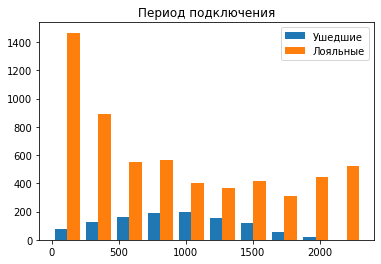

In [44]:
plt.hist([data[data['target'] == 1].totaldays, 
         data[data['target'] == 0].totaldays],
        label=['Ушедшие', 'Лояльные'])
plt.title('Период подключения')
plt.legend()
plt.show()

Для лояльных клиентов имеется 2 пика в районе маленьких и больших времён пользования услугами компании. Ушедшие клиенты демонстрируют другие показатели: имеется только 1 пик в районе 1000 дней.

Посмотрим на виды оплаты для этих двух классов.

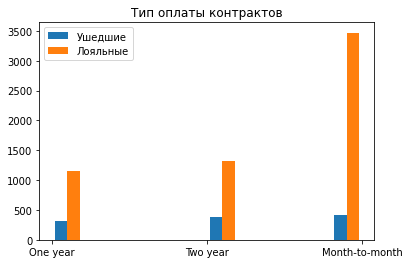

In [45]:
plt.hist([data[data['target'] == 1].Type, 
         data[data['target'] == 0].Type],
        label=['Ушедшие', 'Лояльные'])
plt.title('Тип оплаты контрактов')
plt.legend()
plt.show()

В подавляющем большинстве случаев лояльные клиенты предпочитают использовать ежемесячную оплату.

Посмотрим на методы оплаты для этих двух классов.

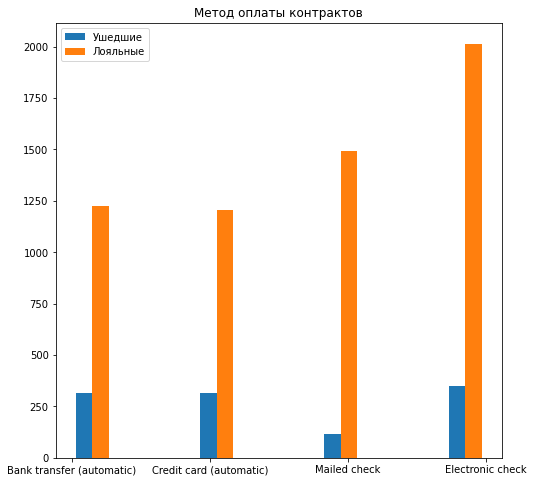

In [46]:
plt.figure(figsize=(8,8))
plt.hist([data[data['target'] == 1].PaymentMethod, 
         data[data['target'] == 0].PaymentMethod],
        label=['Ушедшие', 'Лояльные'])
plt.title('Метод оплаты контрактов')
plt.legend()
plt.show()

Лояльные клиенты чаще всего используют электронные чеки, в то время как ушедшие меньше всего используют бумажные чеки.

Посмотрим на предоставляемые услуги для этих двух классов.

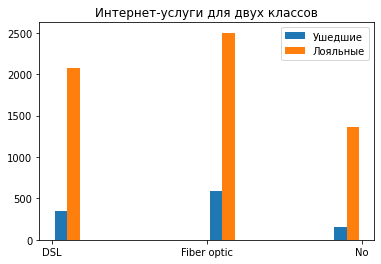

In [47]:
plt.hist([data[data['target'] == 1].InternetService, 
         data[data['target'] == 0].InternetService],
        label=['Ушедшие', 'Лояльные'])
plt.title('Интернет-услуги для двух классов')
plt.legend()
plt.show()

Больше всего клиенты, как лояльные, так и ушедшие, используют оптоволокно. В то же время очень много лояльных клиентов не пользуются интенет- услугами. Вероятность ухода для ушедших клиентов мала, если клиенты не пользуются Интернетом.

Посмотрим на корреляцию между количественными данными.

In [48]:
data[['MonthlyCharges', 'TotalCharges', 'totaldays', 'target']].corr()

,MonthlyCharges,TotalCharges,totaldays,target
MonthlyCharges,1.000000,0.630440,0.220054,0.154286
TotalCharges,0.630440,1.000000,0.821746,0.052175
totaldays,0.220054,0.821746,1.000000,0.016578
target,0.154286,0.052175,0.016578,1.000000


Очень большая корреляция существует между количеством дней и суммарных выплат. Поэтому нужно будет удалить этот столбец.

## Подготовка данных

Удалим столбцы с началом и окончанием контракта, а также суммарные выплаты.

In [49]:
data1 = data.drop(['TotalCharges', 'BeginDate', 'EndDate'], axis=1)

Разбиение данных

In [50]:
RS = 140823
test_ = 0.25

In [51]:
features = data1.drop(columns=['target'])
target = data1['target']

In [52]:
numeric = ['MonthlyCharges', 'totaldays']
cat_columns = features.drop(columns=numeric).columns

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier

Разбиение данных

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                   test_size=test_,
                                                   random_state=RS)

Масштабирование количественных данных

In [55]:
numeric = ['MonthlyCharges', 'totaldays']
cat_columns = features.drop(columns=numeric).columns

scaler = StandardScaler()

scaler.fit(X_train[numeric])

X_train = X_train.copy()
X_train[numeric] = scaler.transform(X_train[numeric])

X_test = X_test.copy()
X_test[numeric] = scaler.transform(X_test[numeric])

In [56]:
cat_columns = features.drop(columns=numeric).columns

Теперь применим one-hot encoding

In [57]:
from sklearn.preprocessing import OneHotEncoder

ohe_enc = OneHotEncoder(drop='first')
ohe_enc.fit(X_train[cat_columns])
new_columns = ohe_enc.get_feature_names(cat_columns)

X_train_ohe = pd.DataFrame(ohe_enc.transform(X_train[cat_columns]).toarray(),
                          columns=new_columns, index=X_train.index)
X_train_ohe = X_train_ohe.join(X_train[numeric])

X_test_ohe = pd.DataFrame(ohe_enc.transform(X_test[cat_columns]).toarray(),
                          columns=new_columns, index=X_test.index)
X_test_ohe = X_test_ohe.join(X_test[numeric])

In [58]:
X_train_ohe.head().T

customerID,2082-CEFLT,5027-XWQHA,6941-KXRRV,4716-MRVEN,8645-KWHJO
Type_One year,0.000000,0.000000,1.000000,1.000000,0.000000
Type_Two year,0.000000,0.000000,0.000000,0.000000,0.000000
PaperlessBilling_Yes,1.000000,0.000000,1.000000,0.000000,1.000000
PaymentMethod_Credit card (automatic),0.000000,0.000000,0.000000,0.000000,0.000000
PaymentMethod_Electronic check,1.000000,1.000000,0.000000,0.000000,1.000000
PaymentMethod_Mailed check,0.000000,0.000000,0.000000,1.000000,0.000000
gender_Male,1.000000,1.000000,0.000000,0.000000,1.000000
SeniorCitizen_1,0.000000,0.000000,1.000000,0.000000,0.000000
Partner_Yes,0.000000,0.000000,1.000000,0.000000,0.000000
Dependents_Yes,0.000000,0.000000,0.000000,0.000000,0.000000


## Обучение моделей

### Логистическая регрессия

In [59]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

model_lr = LogisticRegression(solver='lbfgs', random_state=RS)

search_lr = GridSearchCV(model_lr, param_grid, cv=5, scoring='roc_auc')
search_lr.fit(X_train_ohe, y_train)

print(search_lr.best_params_)
print(search_lr.best_score_)

#pred = search_lr.best_estimator_.predict_proba(X_valid_ohe)[:, 1]

{'C': 100}
0.7486413013961247


### CatBoostClassifier

In [60]:
param_grid = {
    'learning_rate': [0.1, 0.3],
    'iterations': [50, 100],
    'l2_leaf_reg': [3, 9]
}

model_cbc = CatBoostClassifier(random_state=RS, verbose=0)

search_cbc = GridSearchCV(model_cbc, param_grid, cv=5, scoring='roc_auc')
search_cbc.fit(X_train_ohe, y_train)

print(search_cbc.best_params_)
print(search_cbc.best_score_)

#pred = search_cbc.best_estimator_.predict_proba(X_valid_ohe)[:, 1]

{'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}
0.8944669791322999


RandomForestClassifier

In [61]:
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 10],
    'n_estimators': [10, 50, 100], 
}

model_rfc = RandomForestClassifier(random_state=RS)

search_rfc = GridSearchCV(model_rfc, param_grid, cv=5, scoring='roc_auc')
search_rfc.fit(X_train_ohe, y_train)

print(search_rfc.best_params_)
print(search_rfc.best_score_)

#pred = search_rfc.best_estimator_.predict_proba(X_valid_ohe)[:, 1]


{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
0.8114523815506931


In [62]:
table_ra = pd.DataFrame({'Model': ['RandomForestClassifier',
                                'LogisticRegression',
                                'CatBoostClassifier'], 
                      'ROC_AUC':[0.8114523815506931,
                                0.7486413013961247,
                                0.8944669791322999]})
table_ra

,Model,ROC_AUC
0,RandomForestClassifier,0.811452
1,LogisticRegression,0.748641
2,CatBoostClassifier,0.894467


Лучшее значение метрики ROC-AUC показала модель CatBoostClassifier: 0.89, поэтому именно её мы проверим на тестовой выборке.

## Проверка лучшей модели

In [63]:
model_cbc = CatBoostClassifier(random_state=RS, verbose=0,
                               iterations=100, l2_leaf_reg=3,
                               learning_rate=0.3)
model_cbc.fit(X_train_ohe, y_train)

pred = search_cbc.best_estimator_.predict_proba(X_test_ohe)[:, 1]

ROC-AUC score 0.907317340562305


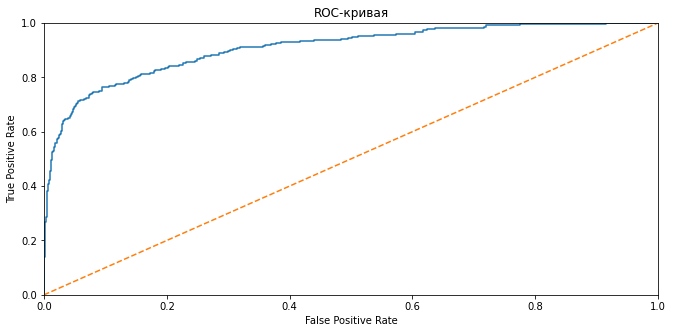

In [64]:
print('ROC-AUC score', roc_auc_score(y_test, pred))
    
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(11, 5))
    
plt.plot(fpr, tpr)
   
plt.plot([0, 1], [0, 1], linestyle='--')
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
    
plt.title('ROC-кривая')
    
plt.show()

Значение метрики ROC-AUC на тестовой выборке равно 0.907317340562305 для нашей лучшей модели CatBoostClassifier.

In [65]:
importance = pd.DataFrame(search_cbc.best_estimator_.feature_importances_, index = X_test_ohe.columns, columns=['importances'])
importance = importance.sort_values(by='importances', ascending=False)

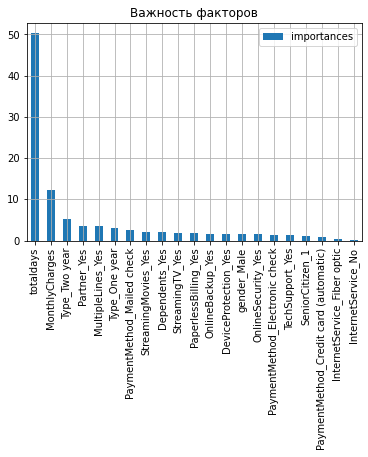

In [66]:
importance.plot(kind='bar', grid=True, title='Важность факторов')
plt.show()

Получается, что самым важным признаком является количество дней, в течение которых клиент пользуется услугами компании. Далее идёт размер ежемесячного платежа, а затем раз в какое время списывается платеж.

## Вывод

В ходе исследовательского анализа данных мы предварительно посмотрели 
на наши данные, провели некоторую визуализацию.
Типы некоторых столбцов были изменены, добавлены новые столбцы с 
целевым признаком и количеством дней, в течение которых клиент
пользовался услугами компании. Соответственно, возникла проблема
мультиколлинеарности, поэтому некоторые столбцы пришлось удалить.

Далее была произведёна непосредственная подготовка данных к обучению:
OHE и масштабирование количественных признаков. Были обучены 3 модели:
* Логистическая регрессия
* Случайный лес
* CatBoost

Лучший результат метрики ROC-AUC на кросс-валидации показала 
модель CatBoostClassifier: 0.894467. 
Затем мы провели анализ важности признаков. Оказалось, что наиболее
важным признаком является количество дней, в течение которых клиент
пользуется услугами.

## Отчёт по финальному проекту

В ходе нашего проекта были выполненые следующие пункты:
* Предобрабодка данных
    1. были изменены типы данных у признаков BeginDate и EndDate - на datetime, MonthlyCharges и TotalCharges - на float
    2. был добавлен признак totaldays, который означает продолжительность времени использовния услуг заказчика его клиентом на момент выгрузки данных в днях
    3. был добавлен целевой признак target. Для факта ухода клиента - 1, и 0, если клиент остался.
    4. далее мы провели некоторую визуализацию данных с целью найти возможную связь между признаками и target
* Обучение
    1. перед обучением мы удалили столбцы BeginDate, EndDate, поскольку эти данные уже содержит столбец totaldays. Кроме того мы удалили столбец TotalCharges, поскольку возникла проблема мультиколлинеарности со столбцом totaldays
    2. далее мы объединили несколько датасетов. В результате образовались пропуски в категориальных признаках, которые мы заполнили значением No
    3. затем мы произвели разделение данных на обучающую и тестовую выборки (размер тестовой выборки = 0.25, параметр random_state = 140823), применили технику OHE и произвели масштабирование количественных признаков
    4. итоговый список признаков: ['Type_One year', 'Type_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
'InternetService_Fiberoptic','InternetService_No','OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes','TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'MonthlyCharges', 'totaldays']
    4. далее мы выбрали 3 модели LogisticRegression, RandomForestClassifier и CatBoostClassifier
* Результаты
    1. лучший результат показала модель CatBoostClassifier со следующими гиперпараметрами: {'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}, значение метрики ROC AUC равно 0.8944669791322999
    2. далее мы проверили нашу лучшую модель на тестовой выборке, в результате чего получили ROC AUC = 0.907317340562305
    3. также мы посмотрели, какие признаки играют наибольшую роль при обучении модели

Ключевые шаги в решении задачи:
* выделение целевого и дополнительного признаков
* объединение таблиц и обработка пропусков
* решение проблемы мультиколинаерности признаков
* выбор лучшей модели